This notebook shows the method of estimating s/n using `dla_cnn.desi.preprocess.py/estimae_s2n`.

In [1]:
%matplotlib notebook
from dla_cnn.desi.DesiMock import DesiMock
from dla_cnn.data_model.Sightline import Sightline
from dla_cnn.desi.preprocess import estimate_s2n
from os.path import join
from matplotlib import pyplot as plt
import numpy as np

In [2]:
file_num = [705,706,711,718,723,731,735,743,747,748,761,773,777,785,789,791]
path = r"F:\Astronamy\desi-0.2-100\desi-0.2-100\desi-0.2-100\spectra-16\7"
file_path = join(path,str(file_num[0]))
spectra = join(file_path,"spectra-16-%s.fits"%file_num[0])
truth = join(file_path,"truth-16-%s.fits"%file_num[0])
zbest = join(file_path,"zbest-16-%s.fits"%file_num[0])#generate file path

In [3]:
spec = DesiMock()
spec.read_fits_file(spectra,truth,zbest)

In [4]:
selected_spectrum = {}
for key,value in spec.data.items():
    z_qso = float("%.1f"%value['z_qso'])
    if z_qso<=4 and z_qso>=2.33 and z_qso not in selected_spectrum:
        selected_spectrum[z_qso] = key
    if len(selected_spectrum)==21:
        break

In [44]:
s2n = []
z_qso = []

In [45]:
for key,value in spec.data.items():
    if value['z_qso']>=2.3:
        sightline = spec.get_sightline(key,camera='b')
        s2n.append(estimate_s2n(sightline))
        z_qso.append(sightline.z_qso)

<IPython.core.display.Javascript object>


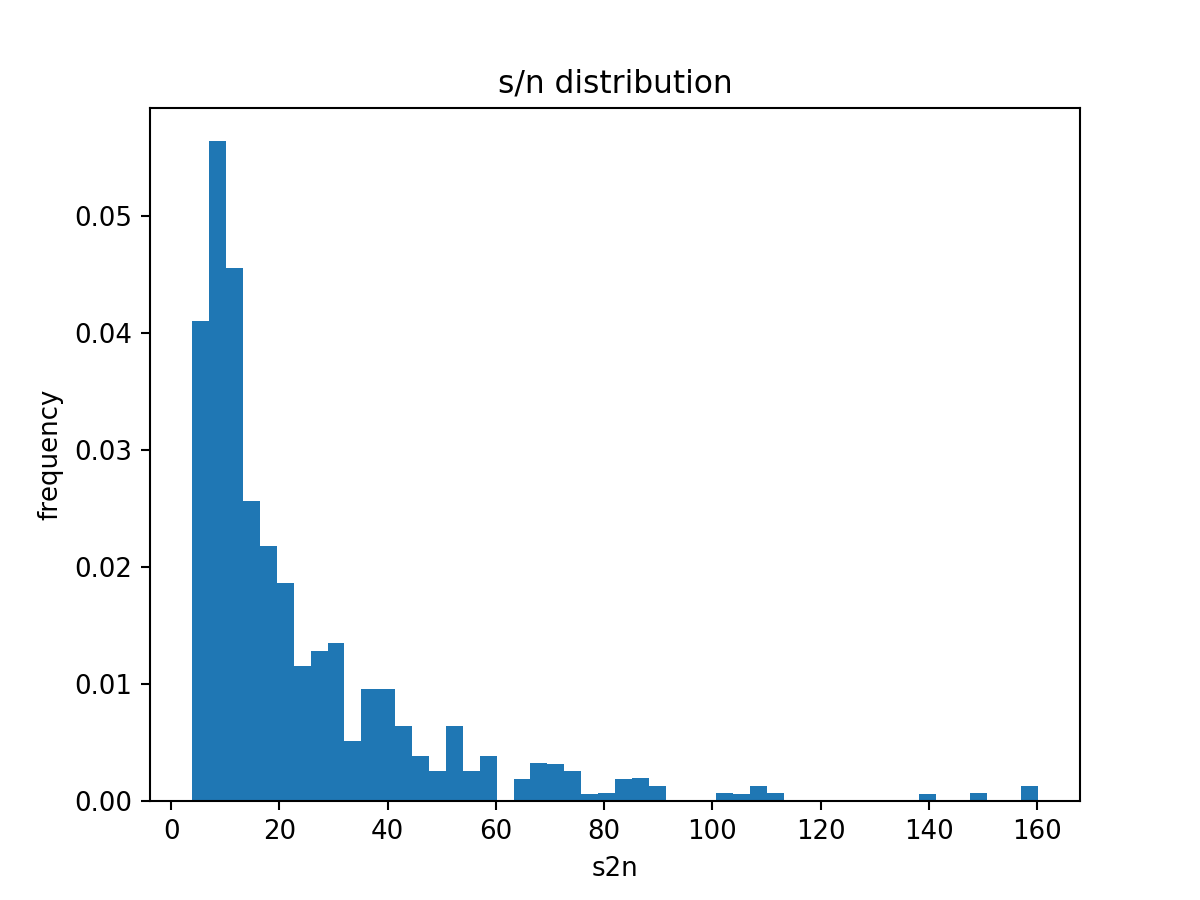

Text(0, 0.5, 'frequency')

In [53]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.hist(s2n,bins=50,density=True,histtype='barstacked')
plt.title("s/n distribution")
plt.xlabel("s2n")
plt.ylabel("frequency")

<IPython.core.display.Javascript object>


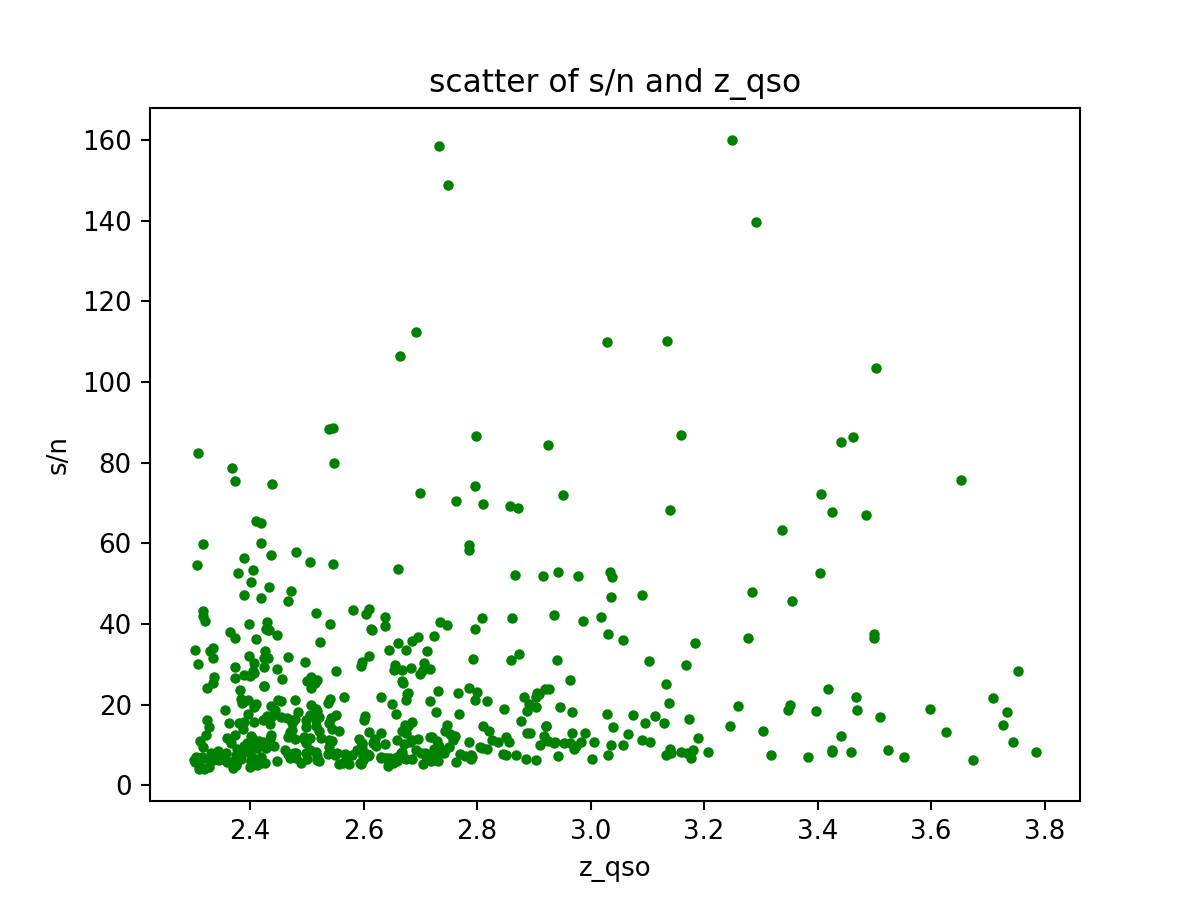

Text(0.5, 1.0, 'scatter of s/n and z_qso')

In [68]:
fig2 = plt.figure()
plt.scatter(z_qso,s2n,marker='.',color='g')
plt.xlabel('z_qso')
plt.ylabel('s/n')
plt.title("scatter of s/n and z_qso")